# 1.1) Define paths
These should be defined after successful upload of dataset and assets (e.g. git keys)

In [22]:
import os

# Define dataset paths
df_icrb_root = '/kaggle/input/deepfashion-icrb'
df_icrb_img_root = f'{df_icrb_root}/Img'
assert os.path.exists(df_icrb_img_root), f'df_icrb_img_root={df_icrb_img_root}: NOT FOUND'

# Define asset paths
git_keys_root = '/kaggle/input/git-keys/github-keys'
assert os.path.exists(git_keys_root), f'git_keys_root={git_keys_root}: NOT FOUND'
client_secrets_path = '/kaggle/input/git-keys/client_secrets.json'
assert os.path.exists(client_secrets_path), f'client_secrets_path={client_secrets_path}: NOT FOUND'

# FIX: We need client_secrets.json to be writable, so copy to /kaggle/working
!cp "$client_secrets_path" /kaggle/working
client_secrets_path = '/kaggle/working/client_secrets.json'

# Create checkpoints & metrics dirs in /kaggle/working
!mkdir -p /kaggle/working/_checkpoints
model_chkpts_root = '/kaggle/working/_checkpoints'
!mkdir -p /kaggle/working/_metrics
model_metrics_root = '/kaggle/working/_metrics'

## 1.2) Clone code repo
Clone achariso/gans-thesis repo into /kaggle/working/code using git clone. For a similar procedure in Colab, see: https://medium.com/@purba0101/how-to-clone-private-github-repo-in-google-colab-using-ssh-77384cfef18f

In [34]:
# Clean failed attempts
!rm -rf /root/.ssh
!rm -rf /kaggle/working/code

In [35]:
!mkdir -p /kaggle/working/code

repo_root = '/kaggle/working/code/gans-thesis'
if not os.path.exists(repo_root):
    # Check that ssh keys exist
    id_rsa_abs_drive = f'{git_keys_root}/id_rsa'
    id_rsa_pub_abs_drive = f'{id_rsa_abs_drive}.pub'
    assert os.path.exists(id_rsa_abs_drive)
    assert os.path.exists(id_rsa_pub_abs_drive)
    # On first run: Add ssh key in repo
    if not os.path.exists('/root/.ssh'):
        # Transfer config file
        ssh_config_abs_drive = f'{git_keys_root}/config'
        assert os.path.exists(ssh_config_abs_drive)
        !mkdir -p ~/.ssh
        !cp -f "$ssh_config_abs_drive" ~/.ssh/
        # Add github.com to known hosts
        !ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts
        # Test ssh connection
        # !ssh -T git@github.com

    # Remove any previous attempts
    !rm -rf "$repo_root"
    !mkdir -p "$repo_root"
    # Clone repo
    !git clone git@github.com:achariso/gans-thesis.git "$repo_root"
    src_root = f'{repo_root}/src'
    !rm -rf "$repo_root"/report

# github.com:22 SSH-2.0-babeld-78794f53
Cloning into '/kaggle/working/code/gans-thesis'...
remote: Enumerating objects: 167, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 778 (delta 87), reused 126 (delta 58), pack-reused 611
Receiving objects: 100% (778/778), 236.99 KiB | 1.09 MiB/s, done.
Resolving deltas: 100% (442/442), done.


## 1.3) Install pip packages
All required files are stored in a requirements.txt files at the repository's root.
Use `pip install -r requirements.txt` from inside the dir to install required packages.

In [36]:
%cd $repo_root
!pip install -r requirements.txt

/kaggle/working/code/gans-thesis
     |████████████████████████████████| 987 kB 880 kB/s eta 0:00:01


  Created wheel for pydrive: filename=PyDrive-1.3.1-py3-none-any.whl size=27435 sha256=b21872169e467ff669a502542eb7df693c957ed26157d9f37c0a4ec247d82e14
  Stored in directory: /root/.cache/pip/wheels/57/cc/07/6aac75f5395a224650905accd38c868c2276782a56f1046b7b
Successfully built pydrive
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


## 1.4) Update path to include src dir
This is necessary for the modules to function correctly

In [49]:
content_root_abs = f'{repo_root}'
src_root_abs = f'{repo_root}/src'
%env PYTHONPATH="/kaggle/lib/kagglegym:/kaggle/lib:$content_root_abs:$src_root_abs"
%cd $src_root

env: PYTHONPATH="/kaggle/lib/kagglegym:/kaggle/lib:/kaggle/working/code/gans-thesis:/kaggle/working/code/gans-thesis/src"
/kaggle/working/code/gans-thesis/src


Symlink to dataset Img folder to avoid code changes and enable interoperability with Google Colab

In [68]:
# To avoid code changes, create symlink for dataset
!mkdir -p "/kaggle/working/data/Datasets/DeepFashion/In-shop Clothes Retrieval Benchmark"
!ln -s "/kaggle/input/deepfashion-icrb/Img" "/kaggle/working/data/Datasets/DeepFashion/In-shop Clothes Retrieval Benchmark"

Run src/main.py script

CycleGANDiscriminator(
  (patch_gan_discriminator): Sequential(
    (0): FeatureMapLayer(
      (feature_map_block): Conv2d(6, 8, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), padding_mode=reflect)
    )
    (1): ContractingBlock(
      (contracting_block): Sequential(
        (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), padding_mode=reflect)
        (1): Identity()
        (2): ReLU()
      )
    )
    (2): ContractingBlock(
      (contracting_block): Sequential(
        (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), padding_mode=reflect)
        (1): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (2): ReLU()
      )
    )
    (3): ContractingBlock(
      (contracting_block): Sequential(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), padding_mode=reflect)
        (1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
   

  INFO     | execution started
  INFO     | tensor_out.shape = [10, 10, 14, 14]
  INFO     | tensor_out.max = 0.7380145192146301
  INFO     | len(train_set) = 83292 | len(test_set) = 9254
  INFO     | len(train_set) = 83292 | len(test_set) = 9254
  INFO     | len(train_set) = 83292 | len(test_set) = 9254
  INFO     | len(train_set) = 83292 | len(test_set) = 9254
  INFO     | train_set[1234] = (torch.Size([3, 256, 256]), torch.Size([3, 256, 256]))
  INFO     | train_set[1234] = (torch.Size([3, 256, 256]), torch.Size([3, 256, 256]))
  INFO     | train_set[1234] = (torch.Size([3, 256, 256]), torch.Size([3, 256, 256]))
  INFO     | train_set[1234] = (torch.Size([3, 256, 256]), torch.Size([3, 256, 256]))
  INFO     | test_set[1234] = (torch.Size([3, 256, 256]), torch.Size([3, 256, 256]))
  INFO     | test_set[1234] = (torch.Size([3, 256, 256]), torch.Size([3, 256, 256]))
  INFO     | test_set[1234] = (torch.Size([3, 256, 256]), torch.Size([3, 256, 256]))
  INFO     | test_set[1234] = (torch

CycleGANGenerator(
  (cycle_gan_generator): Sequential(
    (0): FeatureMapLayer(
      (feature_map_block): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), padding_mode=reflect)
    )
    (1): ContractingBlock(
      (contracting_block): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), padding_mode=reflect)
        (1): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (2): ReLU()
      )
    )
    (2): ContractingBlock(
      (contracting_block): Sequential(
        (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), padding_mode=reflect)
        (1): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (2): ReLU()
      )
    )
    (3): ResidualBlock(
      (conv1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
      (norm1): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine

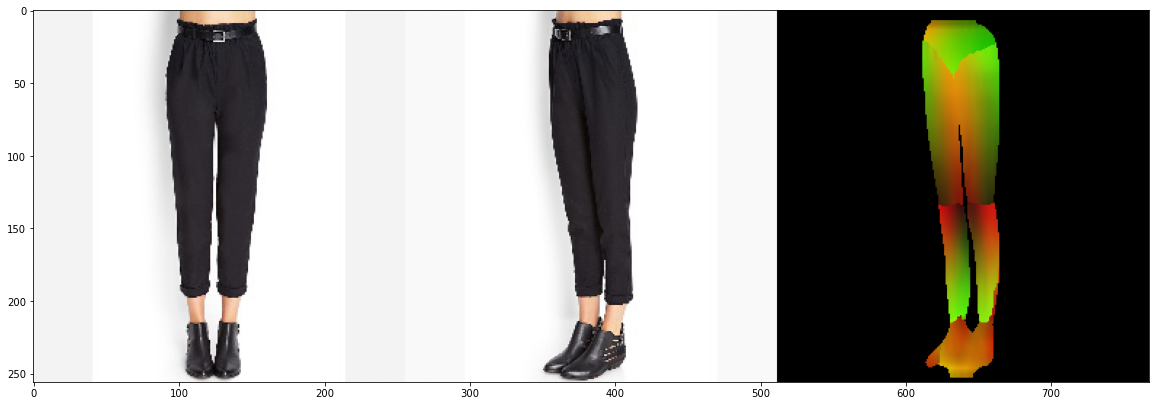

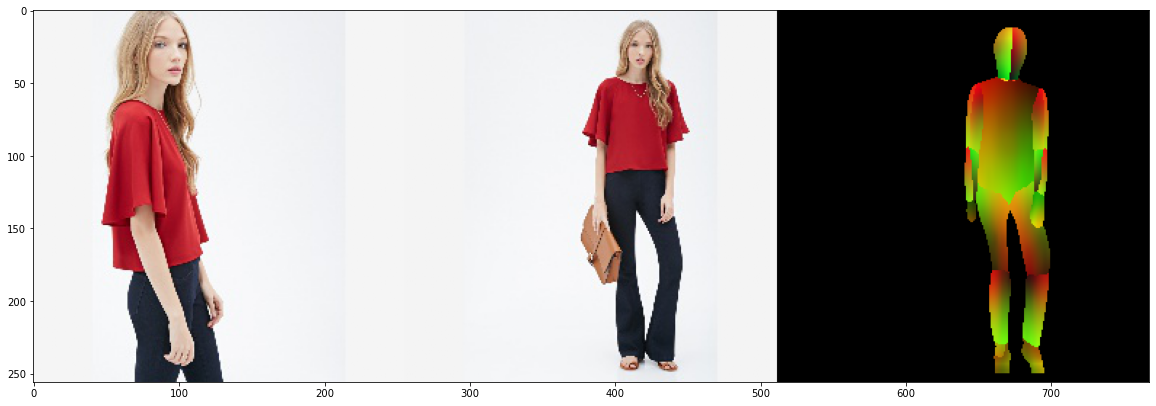

In [74]:
import matplotlib.pyplot as plt

# Fix: Adjust figure size for better plotting in Colab
plt.rcParams["figure.figsize"] = (20, 20)

# Run main script
%run main.py